# Computational physics - Homework 2
 Francesco Emanuele Marcolini, Chiara Simonazzi, Giacomo Marcon.

 In this exercise we will study the ground state of the deuteron nucleus like a 2-particle system in a s-wave state, whose wave-function is composed by a radial term and a spin-isospin term:

$$\psi(\vec r,\sigma_1,\tau_1,\sigma_2,\tau_2 )=\sum_j \psi_j (r) \Phi_j (\sigma_1, \tau_1,\sigma_2,\tau_2 )$$.

Here we consider only the relative part of the wave-function since the center-of-mass component is trivial.
For the spin-isospin part we consider the following basis of anti-symmetric states:

$$\ket{\Phi_A}=\frac{1}{\sqrt2}(\ket{\uparrow\uparrow\uparrow\downarrow}-\ket{\uparrow\downarrow\uparrow\uparrow})$$,
$$\ket{\Phi_B}=\frac{1}{\sqrt2}(\ket{\uparrow\uparrow\downarrow\downarrow}-\ket{\downarrow\downarrow\uparrow\uparrow})$$,
$$\ket{\Phi_C}=\frac{1}{\sqrt2}(\ket{\downarrow\uparrow\downarrow\downarrow}-\ket{\downarrow\downarrow\downarrow\uparrow})$$,
$$\ket{\Phi_D}=\frac{1}{\sqrt2}(\ket{\downarrow\uparrow\uparrow\downarrow}-\ket{\uparrow\downarrow\downarrow\uparrow})$$.

While the radial basis is spanned by eigenstates of the 3D harmonic oscillator:


$$R_n(r)=\widetilde{N}_n(\nu) \frac{e^{-\nu r^2}}{r} H_{2n+1}(\sqrt{2\nu}r)$$,

where $H_n(x)$ are Hermite polynomials.

Putting everything together, $M$ being the size of the basis, the relative state is the following:

$$\psi_M(\vec r,\sigma_1,\tau_1,\sigma_2,\tau_2 )= \sum_{m=1}^M \sum_{j= {A, B, C, D}} c_{mj} R_m (r) \Phi_j (\sigma_1, \tau_1,\sigma_2,\tau_2 )$$.

After finding the correct expression of the normalization constants for the radial basis states we calculate the expression for the matrix elements of the Hamiltonian in the chosen basis: $\bra{mj} \hat H \ket{nk}$.
We proceed computing the total spin and isospin of the ground state and then demonstrating that the same converging result is archived for every value of $\nu$, assuming $M$ to be large.



# Code
## Functions and constants

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.linalg import eigh
from scipy.special import factorial

In [ ]:
d_radius = 2.13 # fm
nu_init = 1/(2*d_radius**2) # fm**(-2)
m_p = 938.272 # MeV
m_n = 939.565 # MeV
mu = m_p*m_n/(m_p+m_n)
hbarc = 1.975e2 # MeV*fm
vr = 200 # MeV
kr = 1.487 # fm**(-2)
vt = -178 # MeV
kt = 0.639 # fm**(-2)
vs = -91.85 # MeV
ks = 0.465 # fm**(-2)

In [ ]:
M_test = 5
M = M_test
nu = nu_init

## Kinetic energy

The base states R_n can be rewritten in terms of the eigenstates of the 1D harmonic oscillator 

$$ <x|n>^H=\psi_n(x)=\frac{1}{\sqrt{2^n n!}} \frac{m\omega}{\pi \hbar}^{\frac{1}{4}} e^{-\frac{m\omega x^2}{2 \hbar}} H_n  \bigg(\sqrt{\frac{m \omega}{\hbar}x}\bigg) $$

as follows:

$$ u_n(r)=\frac{R_n(r)}{r}=\sqrt{2} <r|2n+1>^H$$

where the factor sqrt(2) arises from the fact that the harmonic oscillator is defined for all real values of x while we need our state to be normalised in [0,+infinity). This is particularly convenient because now we can use the ladder operators a and a+ on our states to simplify the calculation of the effect of the kinetic energy operator on them.

$$ 
p= i \sqrt{\frac{\hbar \mu \omega}{2}} (a^+ -a) \\
p^2 u(r)=-\hbar^2 \frac{d^2}{dr^2} u(r) =-\frac{\hbar \mu \omega}{2}(a^+a^+-a^+a-aa^+-aa) u(r)\\
\nu=\frac{\mu\omega}{2\hbar}\\
<n|T|n>=<n|\frac{p^2}{2\mu}|n> \\
<n|\frac{1}{r^2}\frac{d}{dr}(r^2\frac{d}{dr})|m>=2^H<2n+1|\frac{1}{2}\frac{d^2}{dr^2}|2m+1>^H=-\frac{1}{\hbar^2}^H<2n+1|p^2|2m+1>^H= \\
=\nu ^H<2n+1|(a^+a^+-a^+a-aa^+-aa)|2m+1>^H= \\
=\nu ^H<2n+1|\bigg(\sqrt{(2n+2)(2n+3)}|2m+3>^H-(2m+1)|2m+1>^H-(2m+2)|2m+1>^H+\sqrt{2m(2m+1)}|2m-1> \bigg)=\\
=\nu( \sqrt{2n(2n+1)} \delta_{n,m+1} - (4n+3)\delta_{m,n} +\sqrt{(2n+2)(2n+3)} \delta_{n,m-1})=\\
=-\frac{2 \mu}{\hbar^2}<n|T|n>

$$ 

In [ ]:
def Tfunc(m, n, nu):
    t1 = 0
    if n == m+1:
        t1 = np.sqrt(2 * n * (2 * n + 1))
    t2 = 0
    if m == n+1:
        t2 = np.sqrt((2 * n + 2) * (2 * n + 3))
    t3 = 0
    if m == n:
        t3 = - 4 * n - 3
    return - nu*hbarc**2/(2*mu) * (t1 + t2 + t3)

## Potential energy

We need to compute the Minnesota potential as suggested in the exercise text:

$V = V_R(r) + \frac{1}{2}(1+P^{\sigma})V_T(r) + \frac{1}{2}(1-P^{\sigma})V_S(r)$.

We also need to keep in mind that we are asked to compute the total spin and isospin for the ground state, for this reason it is useful to work with a different basis for the spin-isospin part of the basis-states:

$
\begin{cases}
|\chi_A> &= |\phi_A> \\
|\chi_B> &= \frac{1}{\sqrt{2}}(|\phi_B>+|\phi_D>) \\
|\chi_C> &= |\phi_C> \\
|\chi_D> &= \frac{1}{\sqrt{2}}(|\phi_B>-|\phi_D>), \\
\end{cases}
$ 

in which the basis states are eigenstates of the $S^2$ and $\tau^2$ operators.
We note how in this same basis the $P^{\sigma}$ operator is diagonal, this fact can be used to write the $H$ matrix in block-diagonal form, in such a way to limit the computation. However we will not seek this optimization here.

Using this basis then we can write the potential, isolating the radial and the spin-isospin part: 

$$
\begin{split}
&<\chi_i R_n|V|\chi_j R_m> = \\
&=<R_n|V_R(r)|R_m><\chi_i|\chi_j> + <R_n|V_t(r)|R_m><\chi_i|1+P^{\sigma}|\chi_j> + <R_n|V_s(r)|R_m><\chi_i|1-P^{\sigma}|\chi_j>.
\end{split}
$$

The matrices relative to $1+P^{\sigma}$ and $1-P^{\sigma}$:
$$
1+P^{\sigma} = 
\begin{pmatrix}
2 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 2 & 0 \\
0 & 0 & 0 & 0 \\
\end{pmatrix}
\\
1-P^{\sigma} = 
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 2 \\
\end{pmatrix}.
$$

To compute the radial part $<R_n|V_\gamma(r)|R_m>$ with $\gamma \in \{R, t, s\}$ we need to use both the ortogonality rule for the Hermite polynomials and the formula for $H_n(\eta x)$ provided in the exercise text. Finally we obtain the result: 
$$
<R_n|V_\gamma(r)|R_m> = \sum_{i=1}^m \sum_{j=1}^n C_{ij} \frac{1}{i!j!}\sqrt{\frac{(2m+1)!(2n+1)!}{(2(m-i)+1)!(2(n-j)+1)!}} \delta_{m-i, n-j},
$$

where:

$$
C_{ij} \equiv \frac{v_\gamma}{2\sqrt{2\nu+k_\gamma}} \eta^{2(m+n-i-j+1)} (\eta^2-1)^{i+j} 2^{2(m-i)+1} \sqrt{\frac{2\nu}{2^{2n}2^{2m}}},
$$

where finally: $\eta \equiv \sqrt{\frac{2\nu}{2\nu+k_\gamma}}.$

Using this results we can now implement the routines needed to compute the potential part of the $H$ matrix elements.

In [ ]:
def Ufunc_tot(nu, vi, ki, m, n):
    c = vi / 2
    cp = c / np.sqrt(2*nu+ki)
    eta = np.sqrt(2*nu / (2*nu+ki))
    def cpp_ij(i, j):
        return cp * eta**( 2 * (m + n - i - j + 1) ) * (eta**2 - 1)**(i + j) * 2**(2*(m-i)+1) * np.sqrt(2*nu / 2**(2*n) / 2**(2*m))
    
    out = 0
    for i in range(0, m+1):
        for j in range(0, n+1):
            if m-i == n-j:
                log1 = 1/2*np.log(factorial(2*m+1))
                log2 = 1/2*np.log(factorial(2*n+1))
                log3 = - 1/2*np.log(factorial(2*(m-i)+1))
                log4 = - 1/2*np.log(factorial(2*(n-j)+1))
                log5 = - np.log(factorial(i))
                log6 = - np.log(factorial(j))
                log_fact = log1+log2+log3+log4+log5+log6
                out += cpp_ij(i, j) * np.exp(log_fact)
            else:
                out += 0
    return out


## Filling the $H$ matrix

In [ ]:
def genH(M, nu):
    H = np.zeros((4*M, 4*M))
    I = np.array([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,1,0],
                  [0,0,0,1]], dtype = float)
    M_R = I
    M_T = np.array([[2,0,0,0],
                    [0,2,0,0],
                    [0,0,2,0],
                    [0,0,0,0]], dtype = float)
    M_S = np.array([[0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0],
                    [0,0,0,2]], dtype = float)
    M_T /= 2
    M_S /= 2
    for m in range(M):
        for n in range(M):
            T = Tfunc(m, n, nu)
            T_mat = T*I
            U_R = Ufunc_tot(nu, vr, kr, m, n)
            U_R_mat = M_R * U_R
            U_T = Ufunc_tot(nu, vt, kt, m, n)
            U_T_mat = M_T * U_T
            U_S = Ufunc_tot(nu, vs, ks, m, n)
            U_S_mat = M_S * U_S
            toinsert = T_mat + U_R_mat + U_T_mat + U_S_mat
            H[4*m:4*(m+1), 4*n:4*(n+1)] = toinsert
    return H

## Solving the generalized eigenvalue problem

In [ ]:
H = genH(M, nu)

### Finding Convergence

In [ ]:
Ms = np.arange(2, 50)
gse = np.zeros(len(Ms))
for i, M in enumerate(Ms):
    H = genH(M, nu)
    eigvalH, eigvecH= eigh(H)
    gse[i] = eigvalH[0]

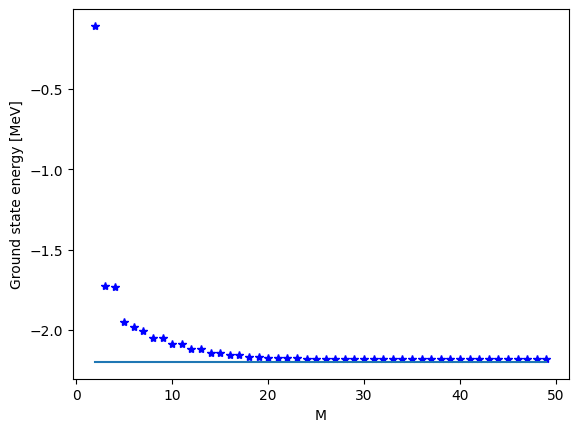

In [ ]:
plt.plot(Ms, gse, 'b*')
plt.xlabel('M')
plt.ylabel('Ground state energy [MeV]')
y=-2.22*np.ones(np.size(Ms))
plt.plot(Ms,y)


## Total spin and isospin

In [ ]:
M_eq = 50
H = genH(M_eq, nu)
eigval, eigvec = eigh(H)
gss = eigvec[0]
prob_spin_1 = 0
prob_isospin_1 = 0
for pos, coef in enumerate(gss):
    if pos % 4 == 0 or pos % 4 == 1 or pos % 4 == 2:
        prob_spin_1 += coef**2
    if pos % 4 == 3:
        prob_isospin_1 += coef**2

total_spin = prob_spin_1
total_isospin = prob_isospin_1
print("The total spin value in the ground state is {:.4f}".format(total_spin))
print("The total isospin value in the ground state is {:.4f}".format(total_isospin))


The total spin value in the ground state is 1.0000
The total isospin value in the ground state is 0.0000


## Check for different $\nu$ values

In [ ]:
nu_num = 15
nu_min = nu_init - 0.7*nu_init
nu_max = nu_init + 0.7*nu_init
nu_vec = np.linspace(nu_min, nu_max, nu_num)
gse_varynu = np.zeros(nu_num) 
for j, nu in enumerate(nu_vec):
    H = genH(M_eq, nu)
    eigvalH_temp, eigvecH_temp= eigh(H)
    gse_varynu[j] = eigvalH_temp[0]

Varying nu we find an averange ground state energy E_0 = -2.1805866789604624 with standard deviation 0.008232737887032465.


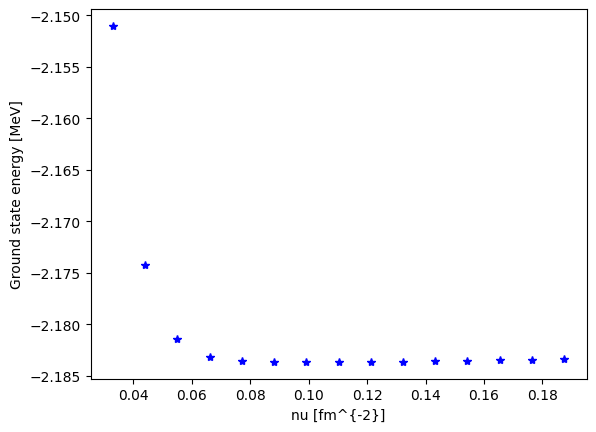

In [ ]:
plt.plot(nu_vec, gse_varynu, 'b*')
plt.xlabel('nu [fm^{-2}]')
plt.ylabel('Ground state energy [MeV]')

nu_mean = np.mean(gse_varynu)
nu_std = np.std(gse_varynu)
print("Varying nu we find an average ground state energy E_0 = {} with standard deviation {}.".format(nu_mean, nu_std))

# Conclusions

The least trivial part of the experience was writing the hamiltonian matrix elements. In order to achieve the result in an efficient way we exploited the relation between the states that form the basis of the problem and the eigenstates of the 1D harmonic oscillator in order to be able to apply the kinetic energy operator in terms of ladder operators. When it came to the Minnesota potential, the matrix elements where found by noticing how the permutator mixes the 4 antysimmetric states arising from different cominations of spin and isospin of the two nucleons.

The diagonalisation routine yields ground state eigenvalues of the hamiltonian that converge towards the theroetical value, which for the deuteron is 2.22 MeV, for increasing values M of the order of polynomial, as one expects to happen using the varialtional method. 

Keeping the highest value of M used in the previous point, the value of the total spin in the ground state (bound) was found to be 1, with total isospin 0.

The original value of nu was chosen so that the width of the gaussian is comparable to the size of the deuteron nucleus, but even changing its value to 15 new values around the original one gives ground state eigenvalues that don't differ substantially from the theoretical prediction, given that M is sufficiently large (M=50 used in the previous part is more that enough).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e4126dc-f129-4e98-a27d-950fd08f732c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>